In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from synthetic import train, set_seed


def theory_value(n, simplex=True):
    if simplex:
        result = (n-1)/n*np.log(n-3)
    else:
        result = np.log((n -2)/2)/2

    if np.any(n <= 3):
        result[n <= 3] = np.nan

    return result

def calculate_normalized_similarity(n, t, num_steps=3000, d_ratio=1, loss="s", cal_nagative_also=False, use_3_layor=False):
    ns = n.reshape(-1)
    ts = t.reshape(-1)

    result = []

    if cal_nagative_also:
        result_negative = []

    for cnt in tqdm(range(len(ns))):
        u_v = train(N=ns[cnt], d=round(ns[cnt]*d_ratio), num_steps=num_steps, loss=loss, loss_t=ts[cnt], loss_b=ts[cnt], use_3_layor=use_3_layor, device="cpu")
        d = np.mean(np.diag(u_v))
        result.append(d)
        if cal_nagative_also:
            result_negative.append(np.mean(np.array(u_v)[np.where(~np.eye(u_v.shape[0],dtype=bool))]))

    if cal_nagative_also:
        return np.array(result).reshape(n.shape), np.array(result_negative).reshape(n.shape)
    else:
        return np.array(result).reshape(n.shape)

In [2]:
set_seed(1234)

n = np.arange(4, 51)
t = np.linspace(0.1, 5, 10)
X, Y = np.meshgrid(n, t)

similarity_infonce = calculate_normalized_similarity(X, Y, num_steps=100, d_ratio=1, loss="i")
similarity_sigmoid = calculate_normalized_similarity(X, Y, num_steps=100, d_ratio=1, loss="s")

Seeded everything: 1234


  0%|          | 0/470 [00:00<?, ?it/s]

100%|██████████| 470/470 [00:14<00:00, 32.71it/s]


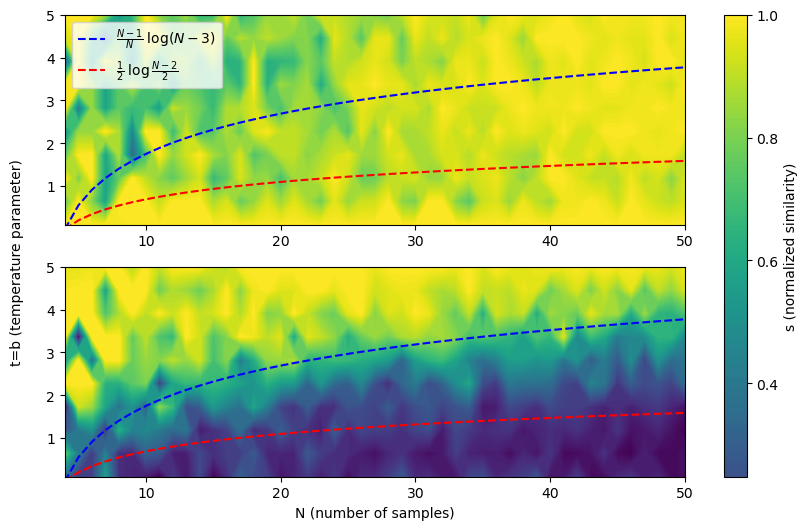

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

contour1 = axs[0].contourf(X, Y, similarity_infonce, cmap='viridis', levels=100, vmin=0, vmax=1)
axs[0].plot(n, theory_value(n), linestyle='--', color="blue", label=r"$\frac{N-1}{N}\;\log(N -3)$")
axs[0].plot(n, theory_value(n, simplex=False), linestyle='--', color="red", label=r"$\frac{1}{2}\;\log\frac{N-2}{2}$")
axs[0].set_xlim(min(n), max(n))
axs[0].set_ylim(min(t), max(t))
axs[0].legend()

contour2 = axs[1].contourf(X, Y, similarity_sigmoid, cmap='viridis', levels=100, vmin=0, vmax=1)
axs[1].plot(n, theory_value(n), linestyle='--', color="blue", label=r"$\frac{N-1}{N}\;\log(N -3)$")
axs[1].plot(n, theory_value(n, simplex=False), linestyle='--', color="red", label=r"$\frac{1}{2}\;\log\frac{N-2}{2}$")
axs[1].set_xlim(min(n), max(n))
axs[1].set_ylim(min(t), max(t))

axs[1].set_xlabel('N (number of samples)')
fig.text(0.07,0.3,'t=b (temperature parameter)', rotation = 'vertical')

fig.subplots_adjust(wspace=0, hspace=0.2)
fig.colorbar(contour1, ax=axs, label='s (normalized similarity)', ticks=np.arange(12)/5, location='right')

plt.show()